In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [4]:
# Load the uploaded CSV
df = pd.read_csv("heart_disease_uci.csv")

# Preview data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("heart_disease_uci.csv")   # change filename to your dataset


In [10]:
print(df.head())     # show first 5 rows
print(df.columns)    # list all column names


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
Index(['

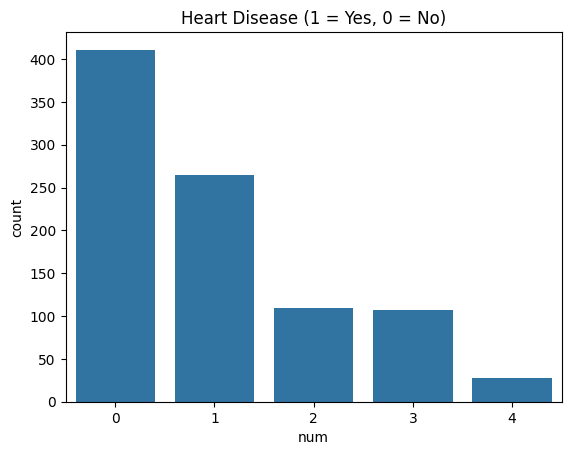

In [16]:
sns.countplot(x= 'num' , data=df)
plt.title("Heart Disease (1 = Yes, 0 = No)")
plt.show()


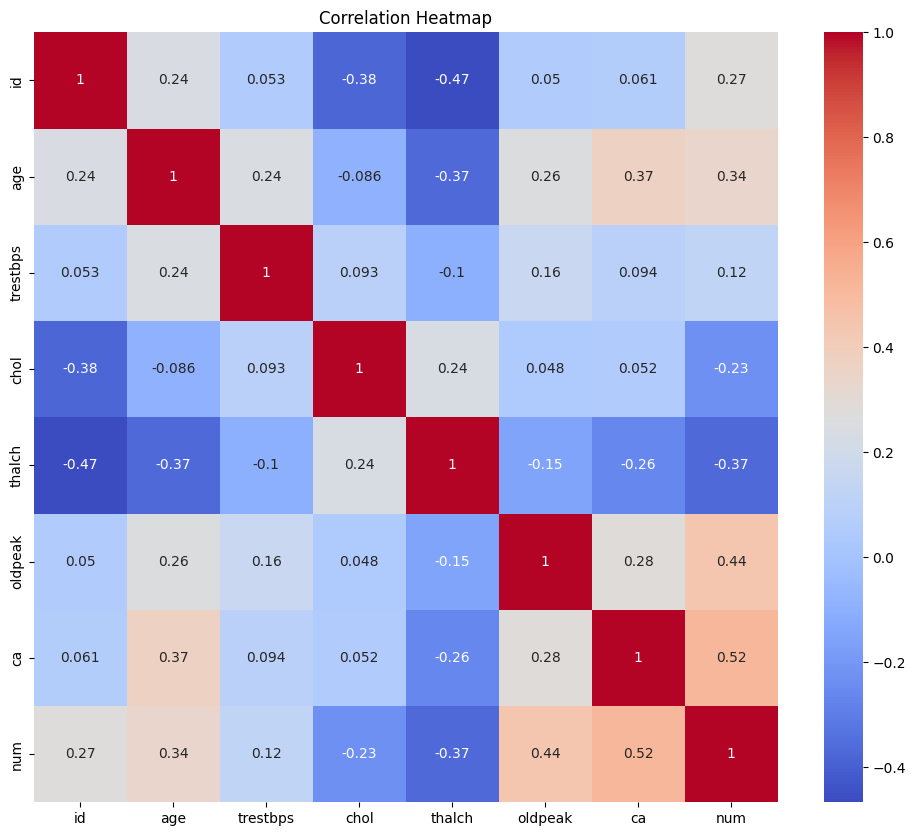

In [13]:
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

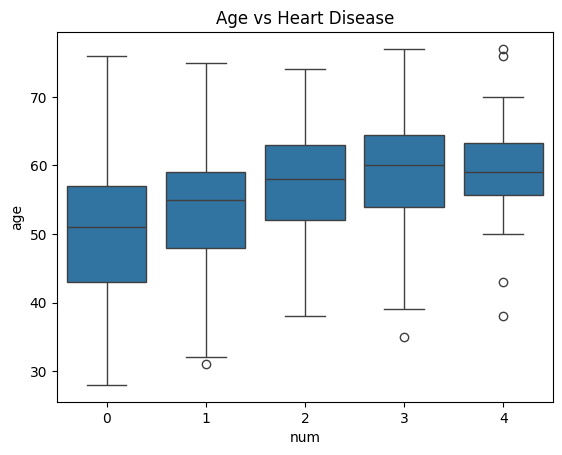

In [15]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

In [17]:
df.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


In [23]:
# Split data
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [24]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Logistic Regression Accuracy: 0.5108695652173914
              precision    recall  f1-score   support

           0       0.63      0.88      0.74        75
           1       0.36      0.43      0.39        54
           2       0.00      0.00      0.00        25
           3       0.38      0.19      0.26        26
           4       0.00      0.00      0.00         4

    accuracy                           0.51       184
   macro avg       0.28      0.30      0.28       184
weighted avg       0.42      0.51      0.45       184

Decision Tree Accuracy: 0.5163043478260869
              precision    recall  f1-score   support

           0       0.66      0.87      0.75        75
           1       0.47      0.52      0.49        54
           2       0.00      0.00      0.00        25
           3       0.12      0.08      0.10        26
           4       0.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.25      0.29      

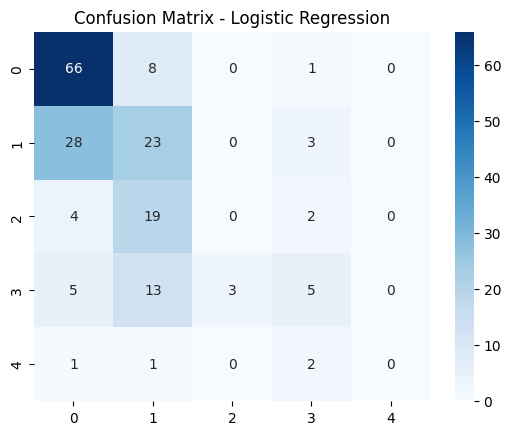

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

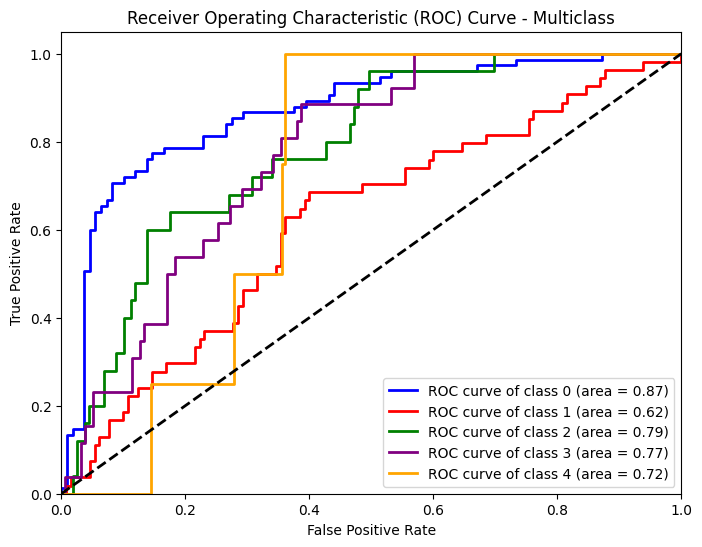

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], log_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()

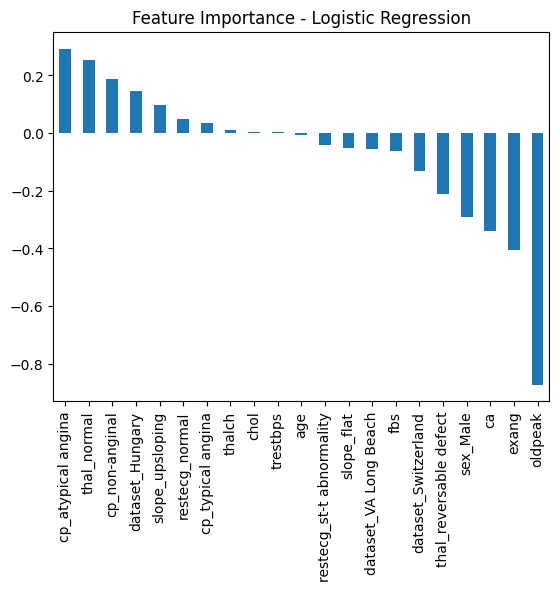

In [28]:
feature_importance_log = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)
feature_importance_log.plot(kind='bar', title="Feature Importance - Logistic Regression")
plt.show()

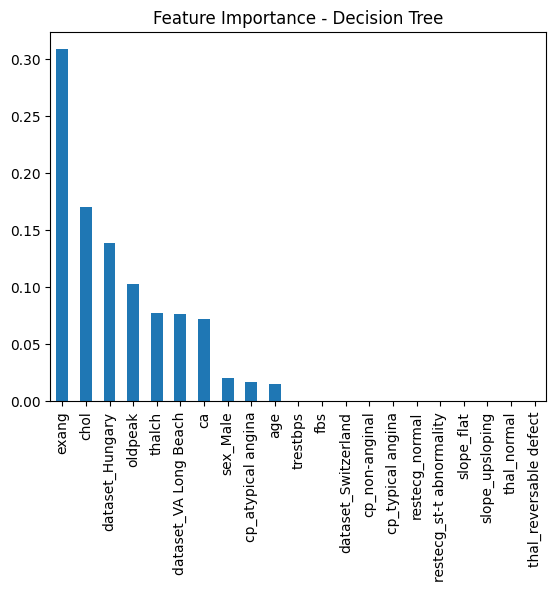

In [29]:
feature_importance_tree = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_tree.plot(kind='bar', title="Feature Importance - Decision Tree")
plt.show()